![](images/vaccine-6116391_1920_pixabay.jpg)

# **COVID-19 Vaccination Progress EDA**

***
***

# Table of Contents

1. INTRODUCTION

    *1.1 COVID-19 pandemic*
    
    *1.2 COVID-19 vaccines*
    
    *1.3 Key objective*
    
    *1.4 Dataset overview*

2. IMPORTS AND DATA PREPARATION

    *2.1 Importing libraries and data*

    *2.2 Preliminary data exploration and subsequent cleaning*

    *2.3 Feature engineering to prepare for in-depth data analysis*

3. IN-DEPTH DATA ANALYSIS AND VISUALISATION

    *3.1 Distributions of .... (abs and %)*
    
    *3.2 Time-course of...*
    
    *3.3 TIme-series analysis of...*

***
***

## 1.4 Dataset Overview

**The dataset contains 8079 observations for 15 features.**

| FEATURE | description | comment |
|----|----|----|
| **country** | 151 countries | some duplicates |
| **iso_code** | country code by ISO norm | -|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **vaccines** | name/company | - |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_raw** | daily vaccinations as CHANGE COMPARED TO PREVIOUS DAY (sanity check) | - |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **total_vaccinations** | absolute number of total immunizations in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **source_name** | national authority, international organization, local organization etc. | - |
| **source_website** | website link | - |

# Introduction

-Vaccinaction: Version 81

-Tweets: Version 43

##Track the progress of COVID-19 vaccination

Was muss für ordentliches Mark up gemacht werden?

-What vaccines are used and in which countries?

-What country is vaccinated more people?

-What country is vaccinated a larger percent from its population?

The submission evaluation will be based on the:

Originality of your solution;
Quality of data analysis;
Methods and techniques presentation;
Quality of results;
Comments and conclusions.

add link to WHO site wrt covid overrview and vaccine overview?
UN recognises 197 countries, 193 are members, we have 151(-4)=149

##Tweets
### Perform sentiment analysis on the tweets looking to things like:

- Sentiment polarity (Negative/Positive/Neutral) in relationship with each vaccine (looking to the association with the vaccine name, as found in tweets);
Evolution of sentiment in time;

Expected:
Data analysis;
Method for sentiment analysis;
Results;
Comments and conclusions.

## Covid-19 vaccination progress:
Content
The data contains the following information:

- Country- this is the country for which the vaccination information is provided;

- Country ISO Code - ISO code for the country;

- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;

- Total number of vaccinations - this is the absolute number of total immunizations in the country;

- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country (daily_vaccinations_raw: daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead);
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
- Number of vaccinations per day - number of daily vaccination for that day and country;
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
- Vaccines used in the country - total number of vaccines used in the country (up to date);
- Source name - source of the information (national authority, international organization, local organization etc.);
- Source website - website of the source of information;


In [130]:
#import basic libraries:
import numpy as np
import pandas as pd
from datetime import datetime

#import for visualization
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from pandas_profiling import ProfileReport

sns.set(rc={'figure.figsize':(20,15)})

import missingno

#suppress pandas future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [131]:
#import dataset country_vaccinations:
df = pd.read_csv('data/country_vaccinations.csv')

In [132]:
#first check:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [133]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
8074,Zimbabwe,ZWE,2021-03-20,42210.0,42210.0,NaN,523.0,836.0,0.28,0.28,NaN,56.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8075,Zimbabwe,ZWE,2021-03-21,42729.0,42729.0,NaN,519.0,910.0,0.29,0.29,NaN,61.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8076,Zimbabwe,ZWE,2021-03-22,43294.0,43294.0,NaN,565.0,805.0,0.29,0.29,NaN,54.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8077,Zimbabwe,ZWE,2021-03-23,44135.0,44135.0,NaN,841.0,655.0,0.30,0.30,NaN,44.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8078,Zimbabwe,ZWE,2021-03-24,49404.0,49404.0,NaN,5269.0,1400.0,0.33,0.33,NaN,94.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...


In [134]:
#Number of columns and rows:
shape1 = df.shape
print(f'We have {shape1[1]} columns and {shape1[0]} rows in our dataset.')

We have 15 columns and 8079 rows in our dataset.


In [135]:
#Information about datatypes per column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8079 non-null   object 
 1   iso_code                             8079 non-null   object 
 2   date                                 8079 non-null   object 
 3   total_vaccinations                   4984 non-null   float64
 4   people_vaccinated                    4423 non-null   float64
 5   people_fully_vaccinated              3021 non-null   float64
 6   daily_vaccinations_raw               4192 non-null   float64
 7   daily_vaccinations                   7891 non-null   float64
 8   total_vaccinations_per_hundred       4984 non-null   float64
 9   people_vaccinated_per_hundred        4423 non-null   float64
 10  people_fully_vaccinated_per_hundred  3021 non-null   float64
 11  daily_vaccinations_per_million

Cleaning task: 
- change object to datetime for column date
- Check missing values in all columns with rows less than 8079

In [136]:
df.nunique()

country                                 151
iso_code                                151
date                                    102
total_vaccinations                     4784
people_vaccinated                      4253
people_fully_vaccinated                2880
daily_vaccinations_raw                 3868
daily_vaccinations                     5563
total_vaccinations_per_hundred         1955
people_vaccinated_per_hundred          1663
people_fully_vaccinated_per_hundred     818
daily_vaccinations_per_million         3698
vaccines                                 26
source_name                              92
source_website                          147
dtype: int64

Categorical data: country, iso_code, vaccines  #source_name, source_website

In [137]:
#basic statistic
df.describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,4984.0,2597915.0,9383280.0,0.0,40452.0,276962.0,1303350.0,130473853.0
people_vaccinated,4423.0,2073454.0,6824277.0,0.0,36780.0,249555.0,1007708.0,85472166.0
people_fully_vaccinated,3021.0,893378.0,3595095.0,1.0,19019.0,111716.0,488937.0,46365515.0
daily_vaccinations_raw,4192.0,92034.0,289560.0,0.0,2738.0,13838.0,56702.0,4575496.0
daily_vaccinations,7891.0,60968.0,213914.0,1.0,1026.0,6161.0,27794.0,2541597.0
total_vaccinations_per_hundred,4984.0,10.0,18.0,0.0,1.0,4.0,11.0,162.0
people_vaccinated_per_hundred,4423.0,8.0,12.0,0.0,1.0,3.0,9.0,90.0
people_fully_vaccinated_per_hundred,3021.0,4.0,8.0,0.0,0.0,2.0,3.0,72.0
daily_vaccinations_per_million,7891.0,2699.0,4163.0,0.0,363.0,1305.0,3211.0,54264.0


In [138]:
#Basic profile
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

Data cleaning tasks:
- countries have different names (e.g. England, United Kingdom, Northern Ireland, Wales, Scotland)
- drop daily_vaccinations_raw
(set categorical data to categorical data tpye)

In [139]:
#copy dataset before cleaning
df1 = df.copy()

In [140]:
#change type for date to datetime
df1['date'] =  pd.to_datetime(df1['date'])
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [59]:
#test changes to date
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8079 non-null   object        
 1   iso_code                             8079 non-null   object        
 2   date                                 8079 non-null   datetime64[ns]
 3   total_vaccinations                   4984 non-null   float64       
 4   people_vaccinated                    4423 non-null   float64       
 5   people_fully_vaccinated              3021 non-null   float64       
 6   daily_vaccinations_raw               4192 non-null   float64       
 7   daily_vaccinations                   7891 non-null   float64       
 8   total_vaccinations_per_hundred       4984 non-null   float64       
 9   people_vaccinated_per_hundred        4423 non-null   float64       
 10  people_fully

In [141]:
# generate preview of entries with null values
#if df.isnull().any(axis=None):
 #   print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
  #  print(df[df.isnull().any(axis=1)].head(3))
   # missingno.matrix(df)
    #plt.show()

In [61]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [62]:
#check for duplicates in country and date:
df1[df1.duplicated(subset=['country','date'], keep=False)].shape

(0, 15)

In [63]:
#drop column daily_vaccinations_raw, iso_code, source_name, source_website:
lst = ['iso_code', 'daily_vaccinations_raw', 'source_name', 'source_website']
df1.drop(lst, 1, inplace=True)
df1.head(3)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca


In [64]:
df1 = df1[df1.country.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [65]:
lst2 = ['England', 'Scotland', 'Wales', 'Northern Ireland']
check1 = df1.loc[df['country'].isin(lst2)].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].sum()
check2 = df1.loc[df['country'] == 'United Kingdom'].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].values[0]
print(f'The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: {check1}')
print(f'The total daily vaccinations in the United Kingdom on 15th March 2021 was: {check2}')

The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: 0.0
The total daily vaccinations in the United Kingdom on 15th March 2021 was: 389942.0


In [67]:
df.isnull().sum(axis = 0)

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3095
people_vaccinated                      3656
people_fully_vaccinated                5058
daily_vaccinations_raw                 3887
daily_vaccinations                      188
total_vaccinations_per_hundred         3095
people_vaccinated_per_hundred          3656
people_fully_vaccinated_per_hundred    5058
daily_vaccinations_per_million          188
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [68]:
lst_empties = ['', []]
df.vaccines.isin(lst_empties).value_counts()

False    8079
Name: vaccines, dtype: int64

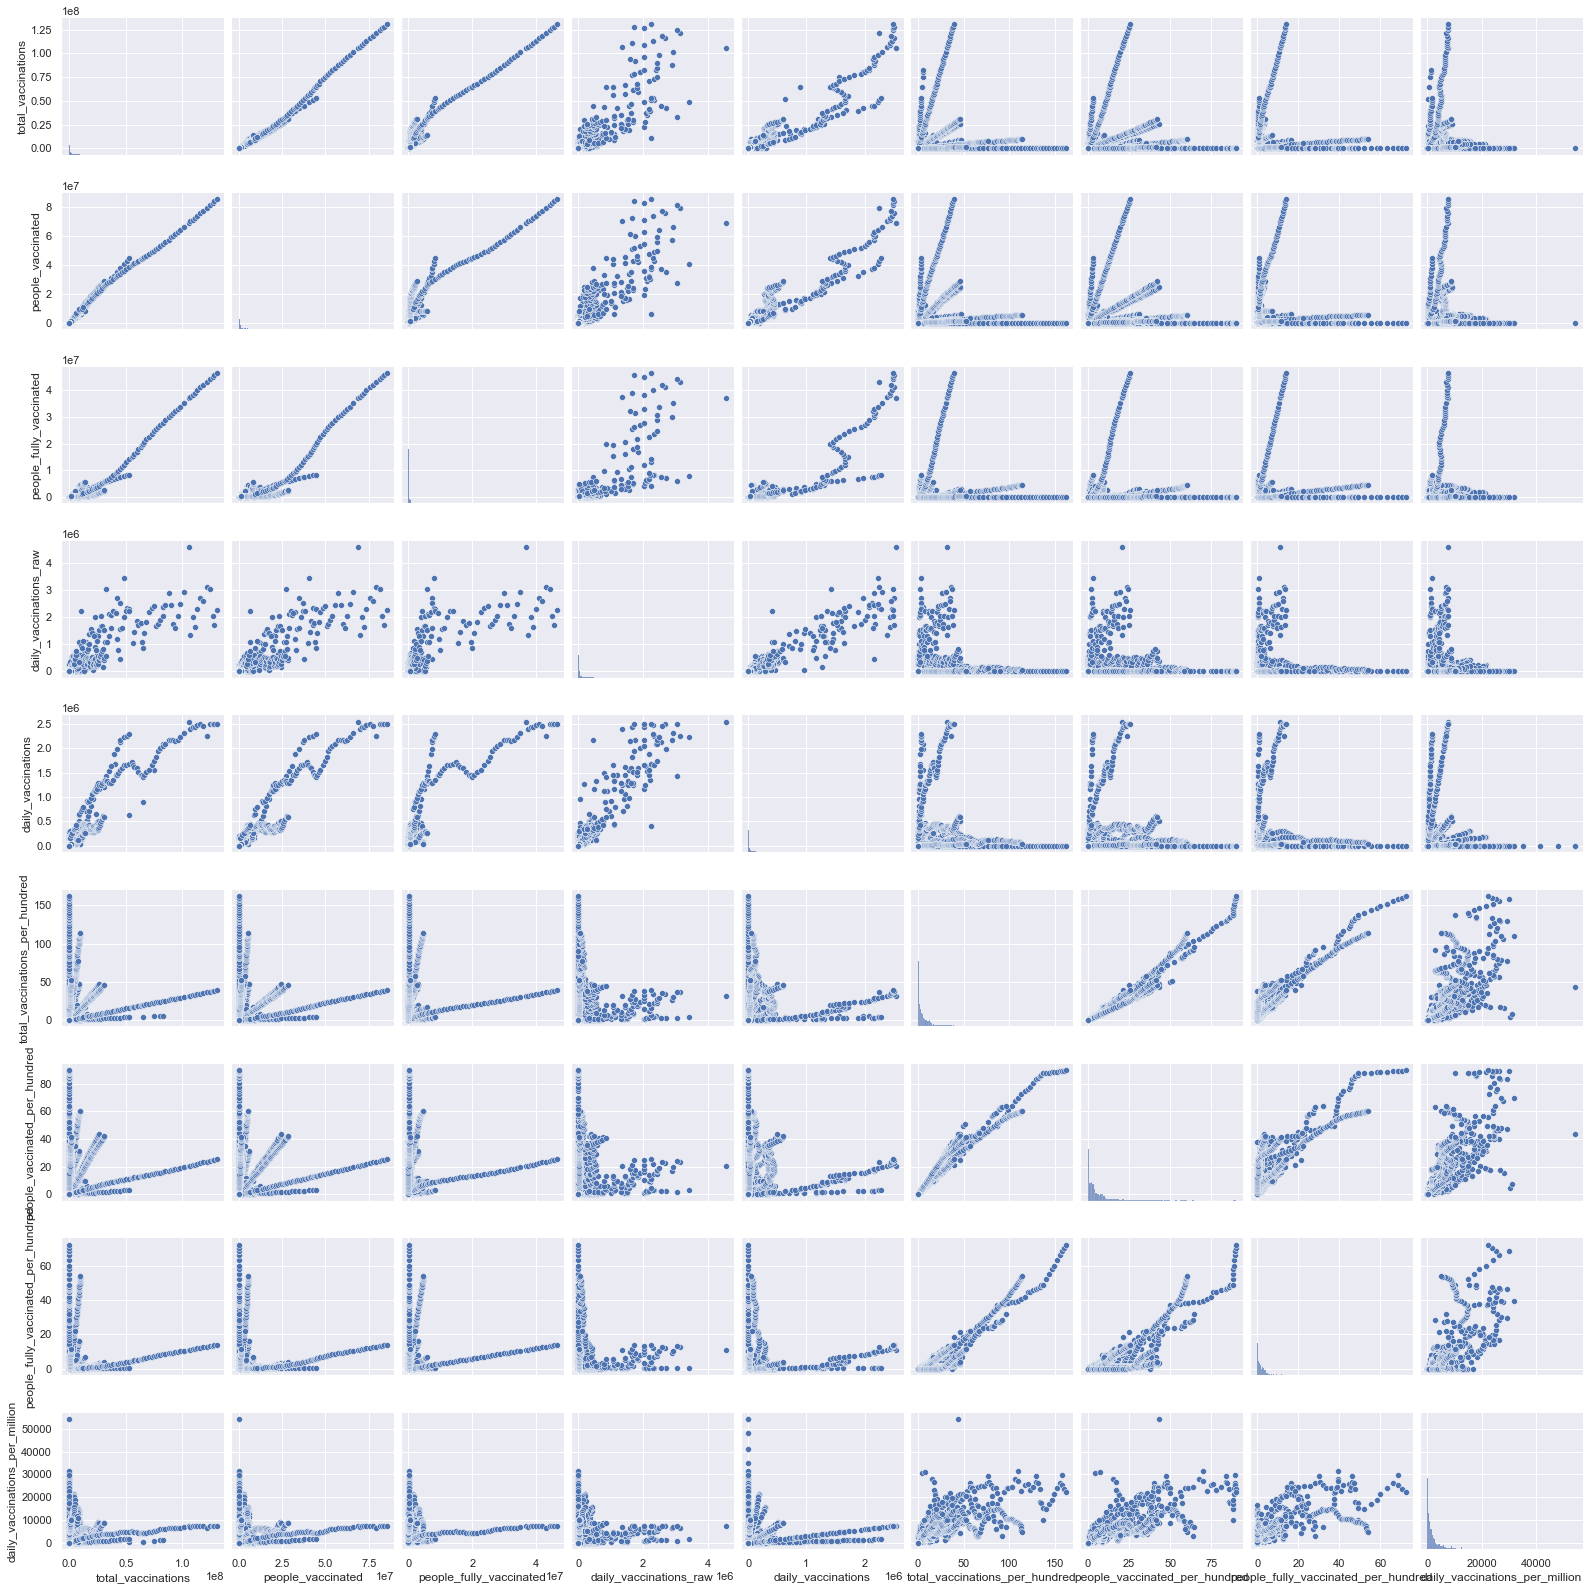

In [69]:
#check correlation of data
sns.pairplot(data=df);

In [70]:
df1['vaccines'].unique()

array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Moderna, Pfizer/BioNTech', 'Moderna',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing', 'EpiVacCorona, Sputnik V',
       'Johnson&Johnson', 'Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, S

In [71]:

df2 = df1.drop('vaccines', axis=1).join(df['vaccines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('vaccines'))
df3 = df2[['country', 'date', 'vaccines']]
df3.head()

,country,date,vaccines
0,Afghanistan,2021-02-22,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,Oxford/AstraZeneca


In [72]:
df4 = df3.pivot(index=['country', 'date'], columns='vaccines', values='vaccines').reset_index()
df4.sample(20)

vaccines,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
5692,Portugal,2021-01-16,NaN,NaN,NaN,Moderna,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
44,Albania,2021-01-31,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
1208,Cambodia,2021-02-18,NaN,NaN,NaN,NaN,NaN,NaN,Sinopharm/Beijing,NaN,NaN,NaN
1908,Cyprus,2021-03-01,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
1058,Brazil,2021-01-29,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,Sinovac,NaN
6206,Saudi Arabia,2021-01-09,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN
7652,Zimbabwe,2021-03-02,NaN,NaN,NaN,NaN,NaN,NaN,Sinopharm/Beijing,NaN,NaN,NaN
1684,Costa Rica,2021-01-19,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
1057,Brazil,2021-01-28,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,Sinovac,NaN
2778,Greece,2020-12-30,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN


In [73]:
lst_ = ['country', 'date', 'vaccines']
df1.drop(lst_, 1, inplace=True)
df1.head(3)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [74]:
df5 = df4.join(df1)
df5.head(3)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,2021-02-22,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [75]:
#ls_vaccine = ['Covaxin', 'Moderna']
#def vaccine_repl(df5): #liste der vaccine und dann als Parameter der Funktion
    #for y in range(len(ls_vaccine)):
   # for column in ls_vaccine:
     #   for x in range(len(column)):
         #       x = 0
           #     print(x)
           #     return x
          #  else:
           #     x == 1
           #     return x
df5['Covaxin'] = df5['Covaxin'].fillna(0)
df5['EpiVacCorona'] = df5['EpiVacCorona'].fillna(0)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].fillna(0)
df5['Moderna'] = df5['Moderna'].fillna(0)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].fillna(0)
df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].fillna(0)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].fillna(0)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].fillna(0)
df5['Sinovac'] = df5['Sinovac'].fillna(0)
df5['Sputnik V'] = df5['Sputnik V'].fillna(0)

In [76]:
df5['Covaxin'] = df5['Covaxin'].replace(['Covaxin'],1)
df5['EpiVacCorona'] = df5['EpiVacCorona'].replace(['EpiVacCorona'],1)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].replace(['Johnson&Johnson'],1)
df5['Moderna'] = df5['Moderna'].replace(['Moderna'],1)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].replace(['Oxford/AstraZeneca'],1)

df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].replace(['Pfizer/BioNTech'],1)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].replace(['Sinopharm/Beijing'],1)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].replace(['Sinopharm/Wuhan'],1)
df5['Sinovac'] = df5['Sinovac'].replace(['Sinovac'],1)
df5['Sputnik V'] = df5['Sputnik V'].replace(['Sputnik V'],1)

In [77]:
#vaccine_repl(df5)
df5.sample(20)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
5749,Portugal,2021-03-14,0,0,0,1,0,1,0,0,0,0,471142.0,377692.0,93450.0,18432.0,1.43,1.15,0.28,559.0
5393,Pakistan,2021-02-13,0,0,0,0,1,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3126,Hungary,2021-01-26,0,0,0,1,1,1,1,0,0,1,NaN,NaN,NaN,547.0,NaN,NaN,NaN,695.0
3348,Indonesia,2021-01-22,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,975.0,NaN,NaN,NaN,2857.0
1026,Bolivia,2021-03-06,0,0,0,0,0,0,0,0,0,1,106182.0,96397.0,9785.0,12595.0,0.91,0.83,0.08,1079.0
4923,Morocco,2021-01-28,0,0,0,0,1,0,1,0,0,0,NaN,NaN,NaN,165.0,NaN,NaN,NaN,4204.0
3786,Japan,2021-02-24,0,0,0,0,0,1,0,0,0,0,9528.0,9528.0,NaN,1189.0,0.02,0.02,NaN,20.0
5391,Pakistan,2021-02-11,0,0,0,0,1,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4029,Kuwait,2021-01-18,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,3008.0,NaN,NaN,NaN,295.0
3377,Indonesia,2021-02-20,0,0,0,0,0,0,0,0,1,0,1390592.0,1390592.0,NaN,198656.0,0.10,0.10,NaN,144.0


In [78]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675 entries, 0 to 7674
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              7675 non-null   object        
 1   date                                 7675 non-null   datetime64[ns]
 2   Covaxin                              7675 non-null   int64         
 3   EpiVacCorona                         7675 non-null   int64         
 4   Johnson&Johnson                      7675 non-null   int64         
 5   Moderna                              7675 non-null   int64         
 6   Oxford/AstraZeneca                   7675 non-null   int64         
 7   Pfizer/BioNTech                      7675 non-null   int64         
 8   Sinopharm/Beijing                    7675 non-null   int64         
 9   Sinopharm/Wuhan                      7675 non-null   int64         
 10  Sinovac     

In [79]:
#check correlation of data
#sns.pairplot(data=df5)

In [80]:
#Number of countries included in dataset:
df6 = df5.copy()
ncountry = df6['country'].nunique()
print(F'{ncountry} countries are included in the Covid-19 vaccination progress dataset.')

147 countries are included in the Covid-19 vaccination progress dataset.


In [81]:
#Create list with countries per region, create new column in df6 and map region to country:
Africa = ('Algeria','Angola',"Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe')

Asia = ('Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam')
    
Middle_East = ('Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen')
   
Europe = ('Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Faeroe Islands','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Northern Cyprus','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','Vatican City')

UK_BritishOversea= ('United Kingdom','Anguilla','Antigua and Barbuda','Bermuda','Cayman Islands','Falkland Islands','Gibraltar','Guernsey','Isle of Man','Jersey', 'Montserrat', 'Saint Helena', 'Turks and Caicos Islands')

North_America = ('Canada','United States')
Central_America_Caribic = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')


continents = {country: 'Asia' for country in Asia}
continents.update({country: 'Europe' for country in Europe})
continents.update({country: 'Africa' for country in Africa})
continents.update({country: 'Middle_East' for country in Middle_East})
continents.update({country: 'UK_BritishOversea' for country in UK_BritishOversea})
continents.update({country: 'North_America' for country in North_America})
continents.update({country: 'Central_America_Caribic' for country in Central_America_Caribic})
continents.update({country: 'South_America' for country in South_America})
continents.update({country: 'Australia_Oceania' for country in Australia_Oceania})

df6['cgrouped'] = df6['country'].map(continents)



In [82]:
df6.sample(5)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,Sputnik V,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped
5484,Panama,2021-03-21,0,0,0,0,0,1,0,0,...,0,697117.0,447691.0,249426.0,15314.0,12.86,8.26,4.60,2825.0,Central_America_Caribic
5907,Romania,2021-02-19,0,0,0,1,1,1,0,0,...,0,315737.0,NaN,NaN,11287.0,3.10,NaN,NaN,1107.0,Europe
3322,India,2021-03-09,1,0,0,0,1,0,0,0,...,0,17515.0,12660.0,4855.0,226.0,5.13,3.71,1.42,662.0,Asia
6562,Slovakia,2021-02-02,0,0,0,0,0,1,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
7295,Ukraine,2021-03-14,0,0,0,0,1,0,0,0,...,0,833191.0,544951.0,288240.0,20991.0,8.25,5.40,2.85,2078.0,Europe


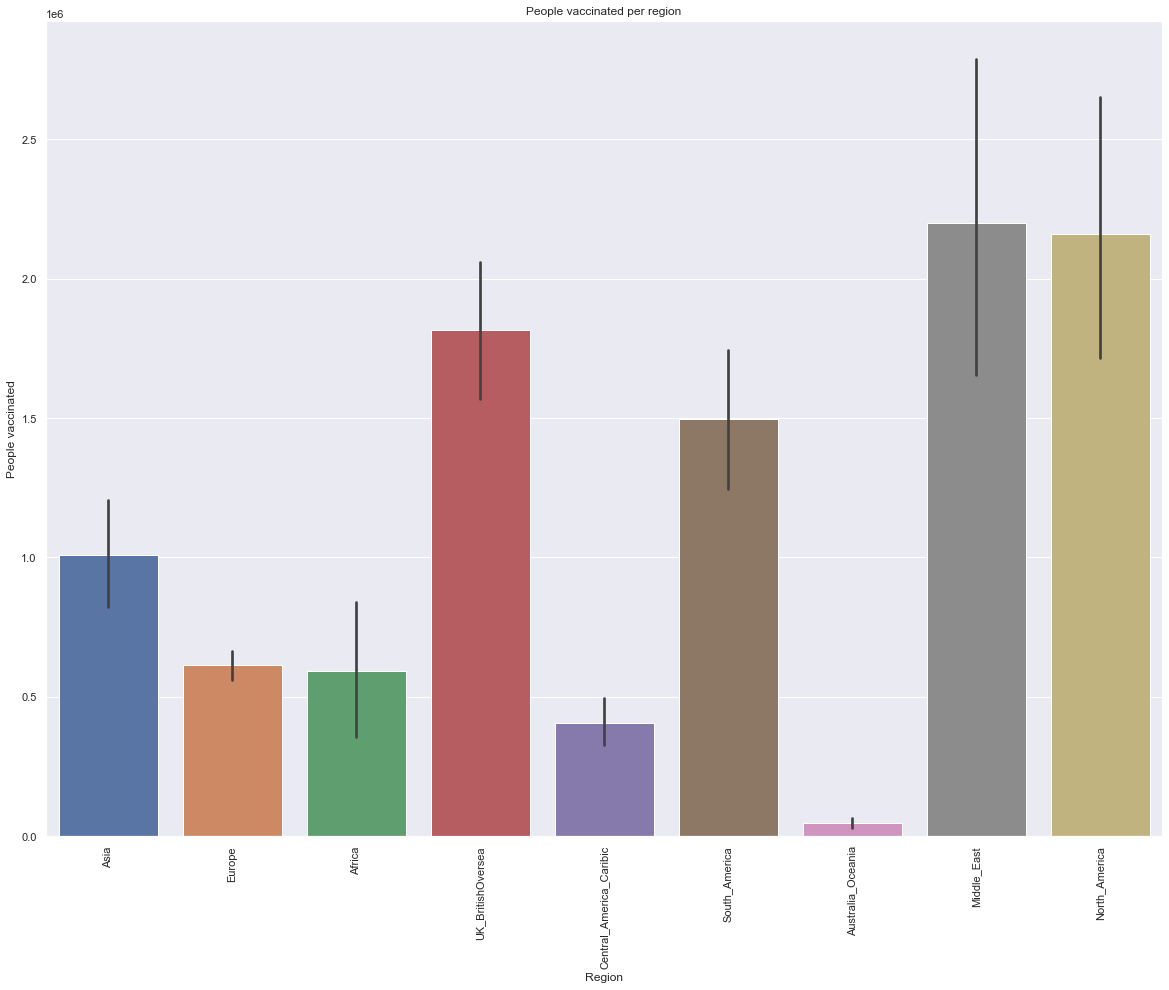

In [155]:
#plot 
sns.barplot(x=df6.cgrouped, y=df6.people_vaccinated)
plt.title('People vaccinated per region')
plt.xlabel('Region')
plt.ylabel('People vaccinated')
plt.xticks(rotation=90);

In [84]:
df6.columns.tolist()

['country',
 'date',
 'Covaxin',
 'EpiVacCorona',
 'Johnson&Johnson',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Sputnik V',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'cgrouped']

In [85]:
#lst_vaccine = [df7['Covaxin'], df7['EpiVacCorona'], df7['Johnson&Johnson'], df7['Moderna'], df7['Oxford/AstraZeneca'], df7['Pfizer/BioNTech'], df7['Sinopharm/Beijing'], df7['Sinopharm/Wuhan'], df7['Sinovac'], df7['Sputnik V']]

In [86]:
#data = df[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
#fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries")
#fig.show();

In [87]:
#daily vaccinations in %
df6['daily_vaccinations_per_hundred'] = df6['daily_vaccinations_per_million']/10000
df6.head(3)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
0,Afghanistan,2021-02-22,0,0,0,0,1,0,0,0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Asia,NaN
1,Afghanistan,2021-02-23,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
2,Afghanistan,2021-02-24,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035


In [88]:
lst_vaccines = df3['vaccines']
vaccince_types = df3.groupby(lst_vaccines)['country'].unique()
vaccince_types = vaccince_types.reset_index()
vaccince_types

,vaccines,country
0,Covaxin,[India]
1,EpiVacCorona,[Russia]
2,Johnson&Johnson,"[South Africa, United States]"
3,Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
4,Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
5,Pfizer/BioNTech,"[Albania, Andorra, Australia, Austria, Bahrain..."
6,Sinopharm/Beijing,"[Argentina, Bahrain, Cambodia, China, Egypt, E..."
7,Sinopharm/Wuhan,"[China, United Arab Emirates]"
8,Sinovac,"[Azerbaijan, Brazil, Chile, China, Colombia, D..."
9,Sputnik V,"[Algeria, Argentina, Bahrain, Belarus, Bolivia..."


In [148]:
df_countries = df2.groupby(['country', 'vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'].max().reset_index()
df_countries.head()

,country,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,Oxford/AstraZeneca,54000.0,54000.0,NaN,2862.0,0.14,0.14,NaN,74.0
1,Albania,Pfizer/BioNTech,53992.0,6073.0,655.0,2946.0,1.88,0.21,0.02,1024.0
2,Algeria,Sputnik V,75000.0,NaN,NaN,3748.0,0.17,NaN,NaN,85.0
3,Andorra,Pfizer/BioNTech,9288.0,7098.0,1265.0,679.0,12.02,9.19,1.64,8788.0
4,Angola,Oxford/AstraZeneca,87022.0,87022.0,NaN,6044.0,0.26,0.26,NaN,184.0


In [149]:
 EU_countries = ['Austria', 'Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia','Spain','Sweden']

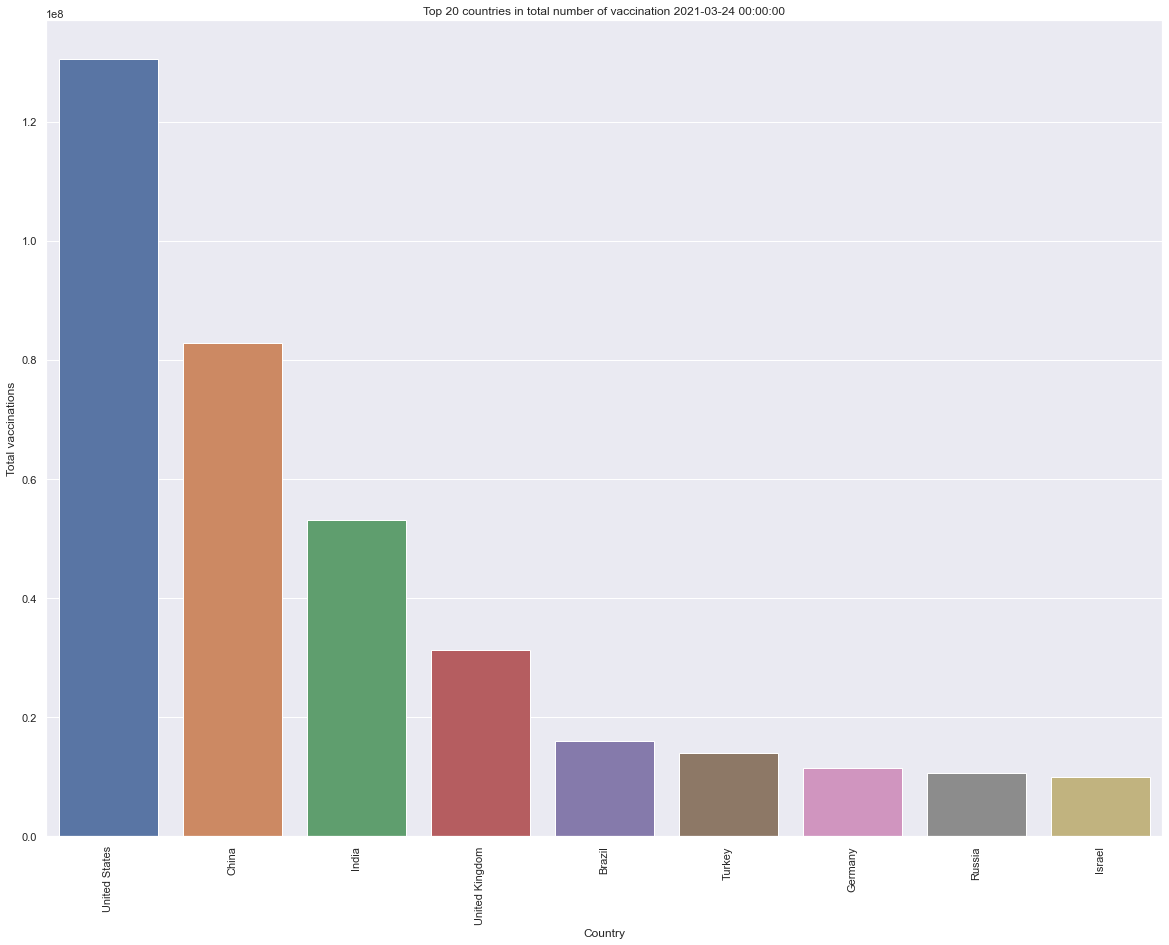

In [150]:
#Number of total vaccinations
data = df_countries[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
sns.barplot(x = 'country', y= 'total_vaccinations', data = data)
d= df2['date'].iloc[-1]
plt.title(f"Top 20 countries in total number of vaccination {d}") 
plt.xlabel('Country')
plt.ylabel('Total vaccinations')
plt.xticks(rotation=90);

In [153]:
df2.query(df2[country] == 'United States')

KeyError: 'Turks and Caicos Islands'

In [92]:
#Vaccination rates in Europe vs. UK:
df_countries1 = df.filter('EU_countries')
print(df_countries1)
#data = df_countries1[['country', 'people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#d= df['date'].iloc[-1]
#plt.title(f"Top 20 countries leading with vaccination progress until {d}") 
#plt.xticks(rotation=90);

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[8079 rows x 0 columns]


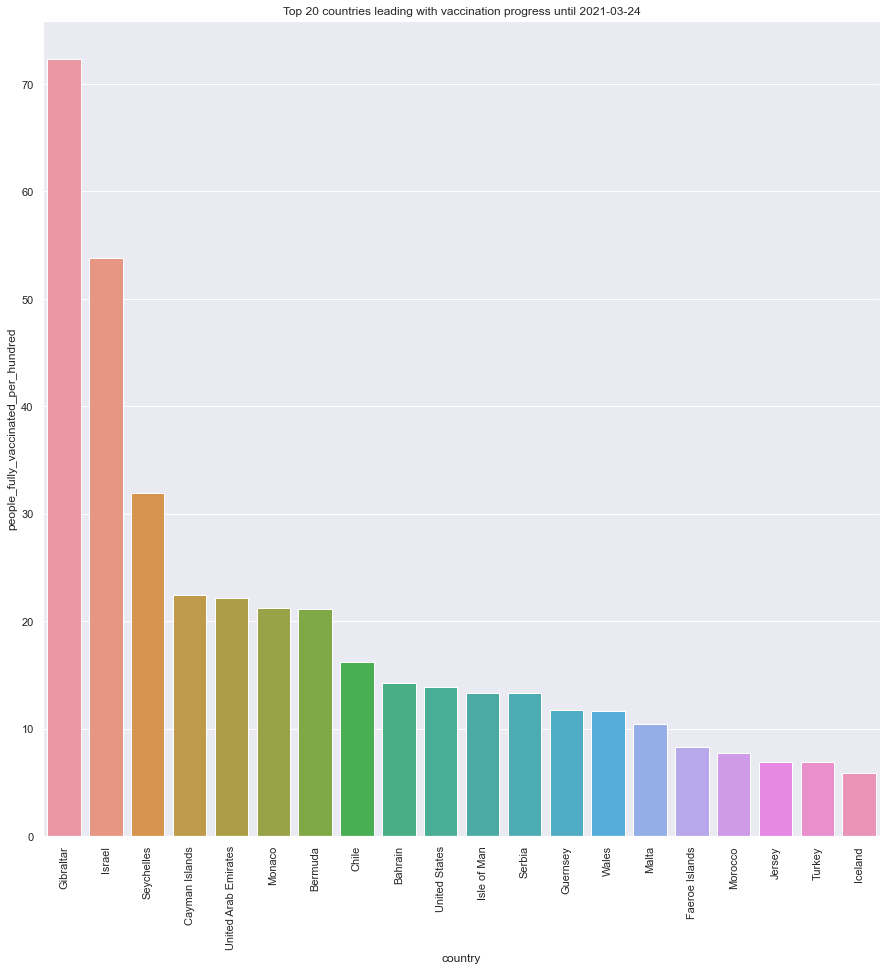

In [93]:
#Top 20 Vaccination rates worldwide:
data = df_countries[['country','people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
d= df['date'].iloc[-1]
plt.title(f"Top 20 countries leading with vaccination progress until {d}") 
plt.xticks(rotation=90);

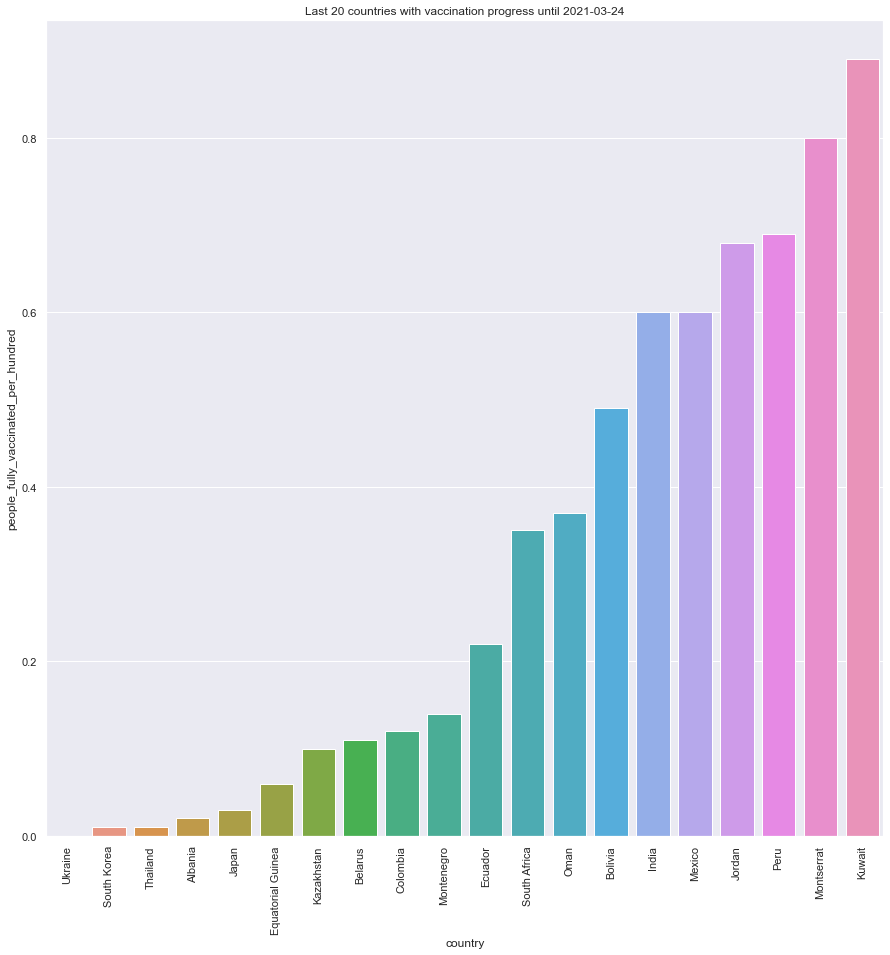

In [94]:
#Last 20 Vaccination rates worldwide:
data = df_countries[['country','people_fully_vaccinated_per_hundred']].nsmallest(20,'people_fully_vaccinated_per_hundred')
sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
d= df['date'].iloc[-1]
plt.title(f"Last 20 countries with vaccination progress until {d}") 
plt.xticks(rotation=90);

In [95]:
#Nan in total_vaccinations_per_hundred
df7 = df6.copy()
df7.head()

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
0,Afghanistan,2021-02-22,0,0,0,0,1,0,0,0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Asia,NaN
1,Afghanistan,2021-02-23,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
2,Afghanistan,2021-02-24,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
3,Afghanistan,2021-02-25,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
4,Afghanistan,2021-02-26,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035


In [96]:
df7[df7.total_vaccinations.isnull()]


,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
1,Afghanistan,2021-02-23,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
2,Afghanistan,2021-02-24,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
3,Afghanistan,2021-02-25,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
4,Afghanistan,2021-02-26,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
5,Afghanistan,2021-02-27,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,United States,2021-03-12,0,0,1,1,0,1,0,0,...,NaN,NaN,NaN,338.0,NaN,NaN,NaN,7.0,North_America,0.0007
7568,United States,2021-03-13,0,0,1,1,0,1,0,0,...,NaN,NaN,NaN,338.0,NaN,NaN,NaN,7.0,North_America,0.0007
7584,Uruguay,2021-03-03,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,966.0,NaN,NaN,NaN,22.0,South_America,0.0022
7600,Uruguay,2021-03-19,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,7703.0,NaN,NaN,NaN,176.0,South_America,0.0176


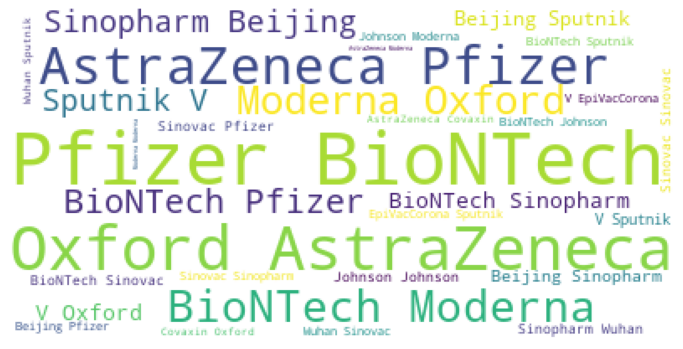

In [97]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.vaccines))

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [98]:
#Change country, iso_code, vaccines to categorical
#df6['country'] = df6['country'].astype('category')

#df6['vaccines'] = df6['vaccines'].astype('category')
#check changes
#df6.info()

Analyzing Timeseries: 
The vaccination progress is reported daily, so that we have timeseries to analyze. First I set a DatetimeIndex as index to our DataFrame.

In [99]:
#set DatetimeIndex as index for our DataFrame:
df_daily = df6.copy()
df_daily = df_daily.set_index('date', 'cgrouped')
df_daily.head(3)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2021-02-22,Afghanistan,0,0,0,0,1,0,0,0,0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Asia,NaN
2021-02-23,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
2021-02-24,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035


In [100]:
df_daily.index

DatetimeIndex(['2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03',
               ...
               '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24'],
              dtype='datetime64[ns]', name='date', length=7675, freq=None)

In [101]:
# Add columns with year, month, and weekday name
df_daily['Year'] = df_daily.index.year
df_daily['Month'] = df_daily.index.month
df_daily['Day'] = df_daily.index.day
#df_daily['Weekday_Name'] = df_daily.index.day_of_week
#TODO: change day of week to name of day
# Display a random sampling of 5 rows
df_daily.sample(5, random_state=0)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day
date,,,,,,,,,,,,,,,,,,,,,
2021-01-23,Slovenia,0,0,0,0,1,1,0,0,0,...,25209.0,7.29,7.29,NaN,3705.0,Europe,0.3705,2021,1,23
2020-12-31,Poland,0,0,0,1,1,1,0,0,0,...,3404.0,NaN,NaN,NaN,15.0,Europe,0.0015,2020,12,31
2021-02-13,Lebanon,0,0,0,0,0,1,0,0,0,...,8551.0,NaN,NaN,NaN,2002.0,Middle_East,0.2002,2021,2,13
2021-03-06,Azerbaijan,0,0,0,0,0,0,0,0,1,...,14415.0,NaN,NaN,NaN,1422.0,Asia,0.1422,2021,3,6
2021-03-21,Malta,0,0,0,1,1,1,0,0,0,...,1494.0,1.27,NaN,NaN,2764.0,Europe,0.2764,2021,3,21


In [102]:
#Select data for a single day:
df_daily.loc['2021-03-24']

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day
date,,,,,,,,,,,,,,,,,,,,,
2021-03-24,Albania,0,0,0,0,0,1,0,0,0,...,2946.0,1.88,NaN,NaN,1024.0,Europe,0.1024,2021,3,24
2021-03-24,Angola,0,0,0,0,1,0,0,0,0,...,6044.0,0.26,0.26,NaN,184.0,Africa,0.0184,2021,3,24
2021-03-24,Argentina,0,0,0,0,1,0,1,0,0,...,94404.0,7.37,5.96,1.40,2089.0,South_America,0.2089,2021,3,24
2021-03-24,Australia,0,0,0,0,1,1,0,0,0,...,17384.0,1.28,NaN,NaN,682.0,Australia_Oceania,0.0682,2021,3,24
2021-03-24,Bahrain,0,0,0,0,1,1,1,0,0,...,13890.0,40.83,26.60,14.23,8163.0,Middle_East,0.8163,2021,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,United Arab Emirates,0,0,0,0,1,1,1,1,0,...,2421.0,0.01,0.01,NaN,35.0,Middle_East,0.0035,2021,3,24
2021-03-24,United States,0,0,1,1,0,1,0,0,0,...,3288.0,0.06,0.06,NaN,72.0,North_America,0.0072,2021,3,24
2021-03-24,Uruguay,0,0,0,0,0,1,0,0,1,...,8267.0,0.25,0.25,0.00,189.0,South_America,0.0189,2021,3,24


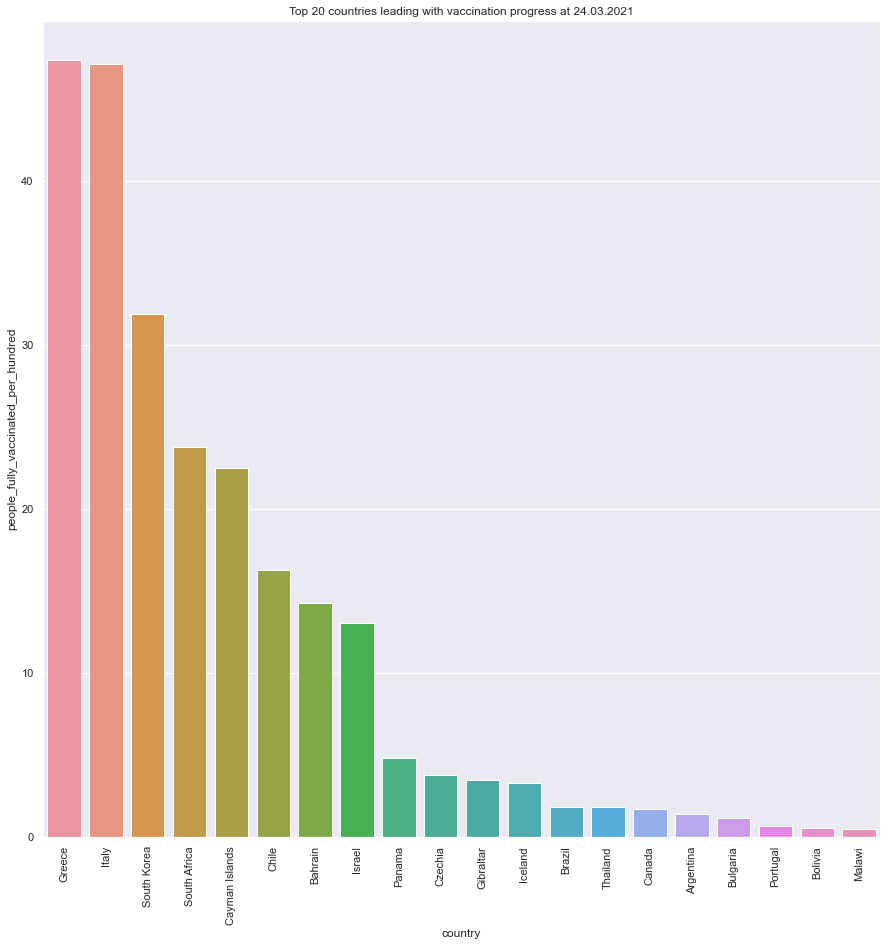

In [103]:
#Top 20 Vaccination rates worldwide only data from 24.03.2021 used:
data = df_daily.loc['2021-03-24'][['country','people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
plt.title(f"Top 20 countries leading with vaccination progress at 24.03.2021") 
plt.xticks(rotation=90);

In [104]:
#
df_daily.loc['2021-01-01':'2021-01-31']

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day
date,,,,,,,,,,,,,,,,,,,,,
2021-01-10,Albania,0,0,0,0,0,1,0,0,0,...,NaN,0.00,0.00,NaN,NaN,Europe,NaN,2021,1,10
2021-01-11,Albania,0,0,0,0,0,1,0,0,0,...,64.0,NaN,NaN,NaN,22.0,Europe,0.0022,2021,1,11
2021-01-12,Albania,0,0,0,0,0,1,0,0,0,...,64.0,0.00,0.00,NaN,22.0,Europe,0.0022,2021,1,12
2021-01-13,Albania,0,0,0,0,0,1,0,0,0,...,63.0,0.01,0.01,NaN,22.0,Europe,0.0022,2021,1,13
2021-01-14,Albania,0,0,0,0,0,1,0,0,0,...,66.0,0.01,0.01,NaN,23.0,Europe,0.0023,2021,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,United States,0,0,1,1,0,1,0,0,0,...,222.0,NaN,NaN,NaN,5734.0,North_America,0.5734,2021,1,27
2021-01-28,United States,0,0,1,1,0,1,0,0,0,...,222.0,NaN,NaN,NaN,5734.0,North_America,0.5734,2021,1,28
2021-01-29,United States,0,0,1,1,0,1,0,0,0,...,222.0,NaN,NaN,NaN,5734.0,North_America,0.5734,2021,1,29


In [105]:
df_daily.loc['2021-03']

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day
date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,Afghanistan,0,0,0,0,1,0,0,0,0,...,1580.0,NaN,NaN,NaN,41.0,Asia,0.0041,2021,3,1
2021-03-02,Afghanistan,0,0,0,0,1,0,0,0,0,...,1794.0,NaN,NaN,NaN,46.0,Asia,0.0046,2021,3,2
2021-03-03,Afghanistan,0,0,0,0,1,0,0,0,0,...,2008.0,NaN,NaN,NaN,52.0,Asia,0.0052,2021,3,3
2021-03-04,Afghanistan,0,0,0,0,1,0,0,0,0,...,2221.0,NaN,NaN,NaN,57.0,Asia,0.0057,2021,3,4
2021-03-05,Afghanistan,0,0,0,0,1,0,0,0,0,...,2435.0,NaN,NaN,NaN,63.0,Asia,0.0063,2021,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-20,Zimbabwe,0,0,0,0,0,0,1,0,0,...,37048.0,63.57,NaN,NaN,3746.0,Africa,0.3746,2021,3,20
2021-03-21,Zimbabwe,0,0,0,0,0,0,1,0,0,...,32894.0,63.95,NaN,NaN,3326.0,Africa,0.3326,2021,3,21
2021-03-22,Zimbabwe,0,0,0,0,0,0,1,0,0,...,28504.0,64.38,NaN,NaN,2882.0,Africa,0.2882,2021,3,22


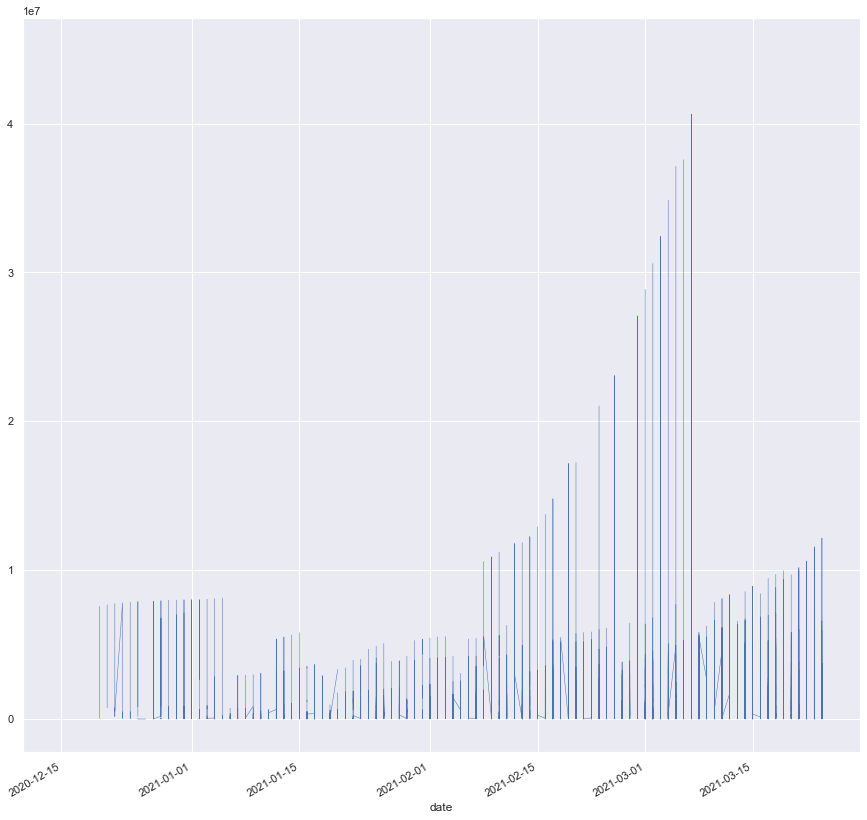

In [106]:
#People vaccinated from december up to now:
df_daily['people_vaccinated'].plot(linewidth=0.5);

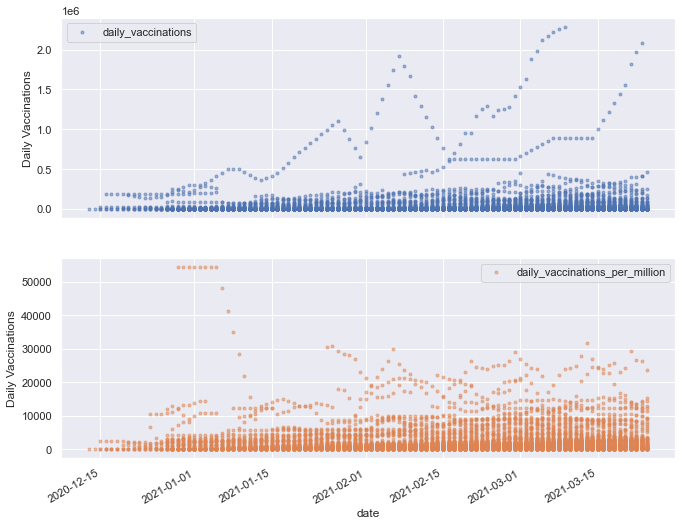

In [107]:
#Daily vaccinations worldwide:
cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Vaccinations')

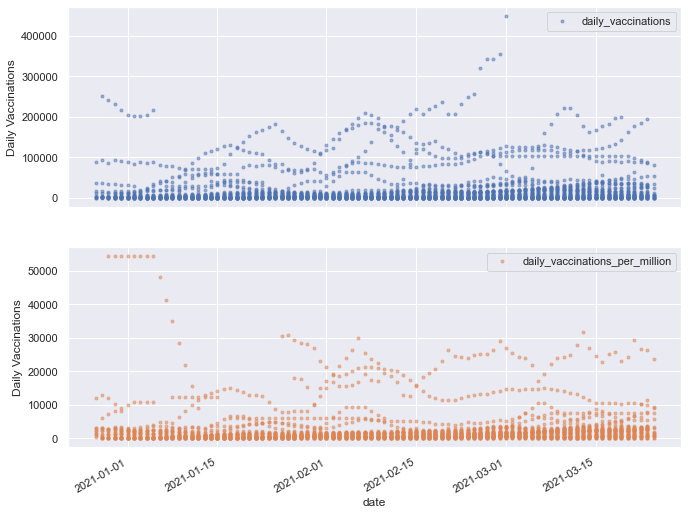

In [108]:
#Daily vaccinations Europe:
df_daily_EU_GB = df_daily[df_daily['cgrouped'] == 'Europe']
cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
axes = df_daily_EU_GB[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Vaccinations')

In [109]:
#Daily vaccinations EU and GB:
#df_daily_EU_GB = df_daily.loc[]
#cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
#axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

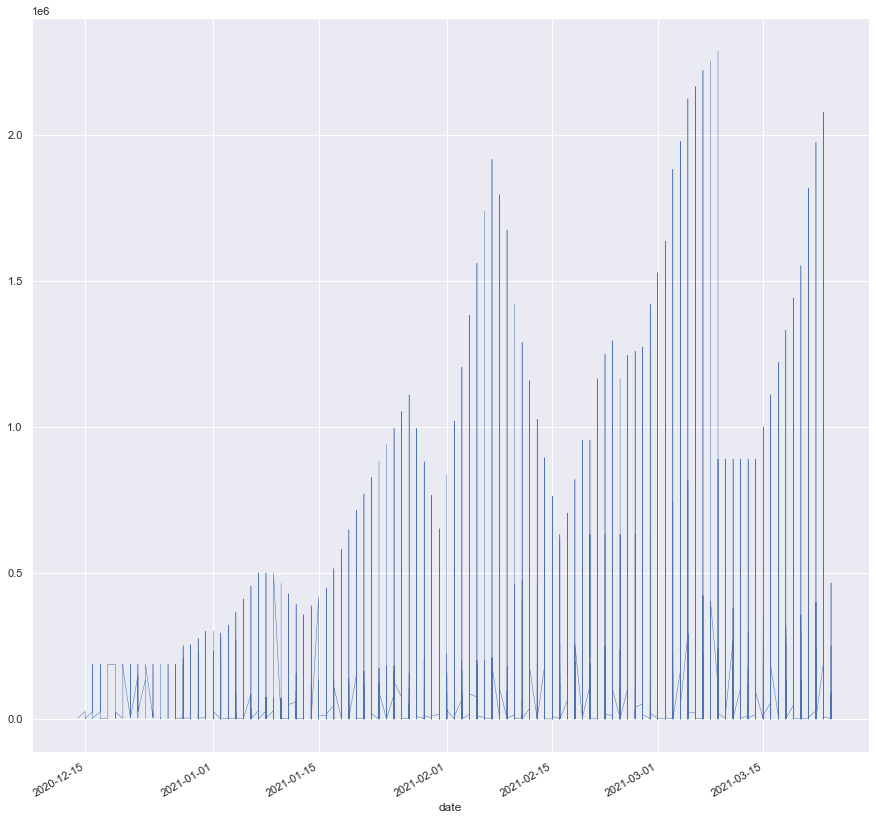

In [110]:
#Daily vaccinated from december up to now:
df_daily['daily_vaccinations'].plot(linewidth=0.5);

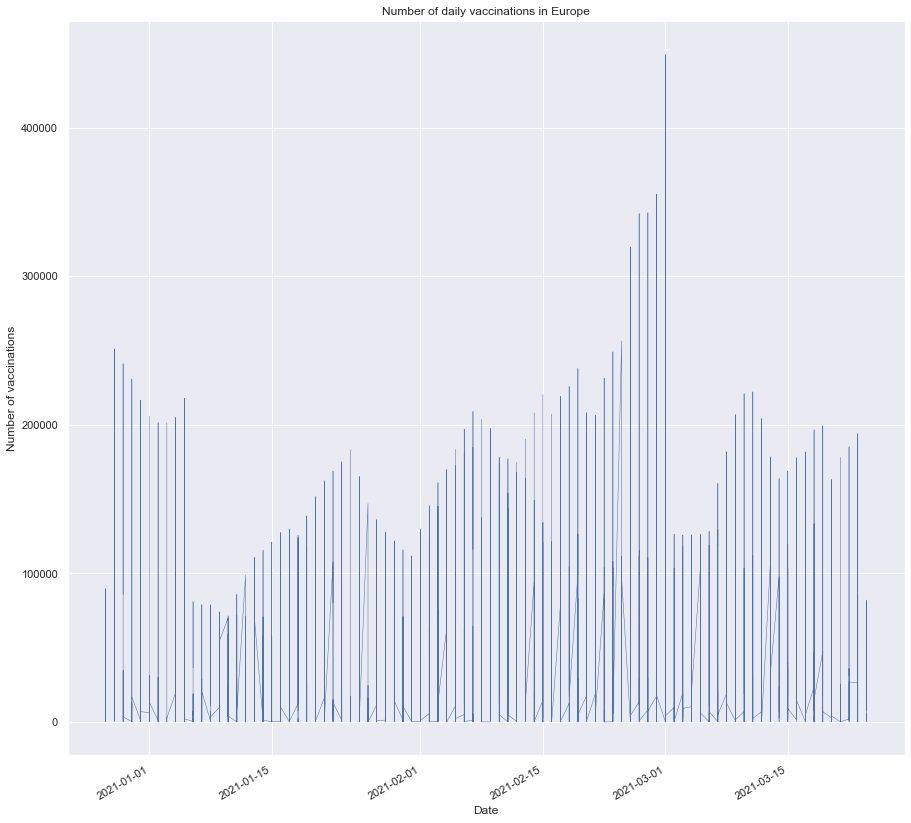

In [111]:
#Daily vaccinated from december up to now for Europe:
df_daily_EU_GB['daily_vaccinations'].plot(linewidth=0.5, title='Number of daily vaccinations in Europe', xlabel = "Date", ylabel = 'Number of vaccinations');

In [112]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']

In [113]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']
UK = df_daily[df_daily['cgrouped'] == 'UK & British Oversea']
USA = df_daily[df_daily['cgrouped'] == 'USA']
Asia = df_daily[df_daily['cgrouped'] == 'Asia']
UK.sample(10)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
df6.sample(20)

###### 

In [ ]:
plt.style.use('seaborn-whitegrid')
cols_plot = ['daily_vaccinations']#'total_vaccinations', , 'daily_vaccinations_per_million'
axes1 = df_daily_EU[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes2= UK[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes3=USA[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes4=Asia[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

# Conclusion

***
# COVID-19 Vaccination Twitter tweets
****

Column Description:
id
user_name
user_location
user_description
user_created - creation of user in twitter
user_followers
user_friends
user_favourites
user_verified
date
text
hashtags
source
retweets
favorites
is_retweet

In [ ]:
#import dataset vaccination_all_tweets:
df_tweet = pd.read_csv('data/vaccination_all_tweets.csv')

In [ ]:
#first check of tweet data:
df_tweet.head()

In [ ]:
#Number of columns and rows:
shapet1 = df_tweet.shape
print(f'We have {shapet1[1]} columns and {shapet1[0]} rows in our twitter tweet dataset.')

In [ ]:
list(df_tweet)

In [ ]:
#information of data types per column:
df_tweet.info()

- change date to datetime
- check columns with rows less than 38547 for missing values

In [ ]:
#profile = ProfileReport(df_tweet, title="Pandas Profiling Report", explorative=True)
#profile

In [ ]:
#copy dataset before cleaning
df_tweet1 = df_tweet.copy()